import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from PIL import Image

In [29]:
female=glob('D:/data science/Module-2/cropped/female_crop/*.png')
male=glob('D:/data science/Module-2/cropped/male_crop/*.png')

In [30]:
path=male+female

In [31]:
def  size(path):
    img=Image.open(path)
    return img.size[0]

In [33]:
size(path[0])

182

In [19]:
df=pd.DataFrame(data=path,columns=['path'])

In [21]:
df.shape

(6058, 1)

In [22]:
df

,path
0,D:/data science/Module-2/cropped/male_crop\mal...
1,D:/data science/Module-2/cropped/male_crop\mal...
2,D:/data science/Module-2/cropped/male_crop\mal...
3,D:/data science/Module-2/cropped/male_crop\mal...
4,D:/data science/Module-2/cropped/male_crop\mal...
...,...
6053,D:/data science/Module-2/cropped/female_crop\f...
6054,D:/data science/Module-2/cropped/female_crop\f...
6055,D:/data science/Module-2/cropped/female_crop\f...
6056,D:/data science/Module-2/cropped/female_crop\f...


In [34]:
df['size']=df['path'].apply(size)

In [35]:
df

,path,size
0,D:/data science/Module-2/cropped/male_crop\mal...,182
1,D:/data science/Module-2/cropped/male_crop\mal...,81
2,D:/data science/Module-2/cropped/male_crop\mal...,81
3,D:/data science/Module-2/cropped/male_crop\mal...,122
4,D:/data science/Module-2/cropped/male_crop\mal...,273
...,...,...
6053,D:/data science/Module-2/cropped/female_crop\f...,182
6054,D:/data science/Module-2/cropped/female_crop\f...,81
6055,D:/data science/Module-2/cropped/female_crop\f...,122
6056,D:/data science/Module-2/cropped/female_crop\f...,182


In [36]:
df.describe()

,size
count,6058.000000
mean,155.701717
std,72.415094
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


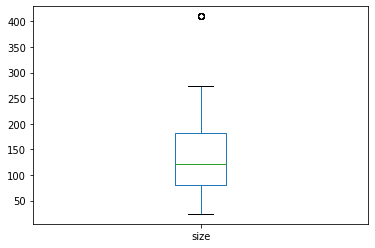

In [38]:
df['size'].plot(kind='box')

(array([   8.,    0.,  595.,    0., 1000.,    0.,    0., 1521.,    0.,
           0.,    0.,    0., 1737.,    0.,    0.,    0.,    0.,    0.,
           0., 1187.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,   10.]),
 array([ 24.        ,  36.86666667,  49.73333333,  62.6       ,
         75.46666667,  88.33333333, 101.2       , 114.06666667,
        126.93333333, 139.8       , 152.66666667, 165.53333333,
        178.4       , 191.26666667, 204.13333333, 217.        ,
        229.86666667, 242.73333333, 255.6       , 268.46666667,
        281.33333333, 294.2       , 307.06666667, 319.93333333,
        332.8       , 345.66666667, 358.53333333, 371.4       ,
        384.26666667, 397.13333333, 410.        ]),
 <a list of 30 Patch objects>)

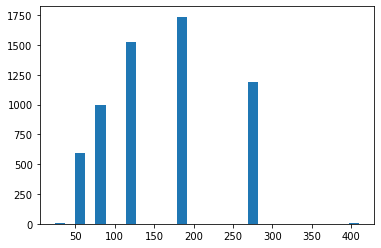

In [40]:
plt.hist(df['size'],bins=30)

In [43]:
df1=df[df['size']>60]

In [44]:
df1

,path,size
0,D:/data science/Module-2/cropped/male_crop\mal...,182
1,D:/data science/Module-2/cropped/male_crop\mal...,81
2,D:/data science/Module-2/cropped/male_crop\mal...,81
3,D:/data science/Module-2/cropped/male_crop\mal...,122
4,D:/data science/Module-2/cropped/male_crop\mal...,273
...,...,...
6053,D:/data science/Module-2/cropped/female_crop\f...,182
6054,D:/data science/Module-2/cropped/female_crop\f...,81
6055,D:/data science/Module-2/cropped/female_crop\f...,122
6056,D:/data science/Module-2/cropped/female_crop\f...,182


In [53]:
string=df1['path'][0]
def gender(string):
    try:
        return string.split("_")[0].split('/')[-1]
    except:
        None

In [54]:
df['gender']=df['path'].apply(gender)

In [55]:
df

,path,size,gender
0,D:/data science/Module-2/cropped/male_crop\mal...,182,male
1,D:/data science/Module-2/cropped/male_crop\mal...,81,male
2,D:/data science/Module-2/cropped/male_crop\mal...,81,male
3,D:/data science/Module-2/cropped/male_crop\mal...,122,male
4,D:/data science/Module-2/cropped/male_crop\mal...,273,male
...,...,...,...
6053,D:/data science/Module-2/cropped/female_crop\f...,182,female
6054,D:/data science/Module-2/cropped/female_crop\f...,81,female
6055,D:/data science/Module-2/cropped/female_crop\f...,122,female
6056,D:/data science/Module-2/cropped/female_crop\f...,182,female


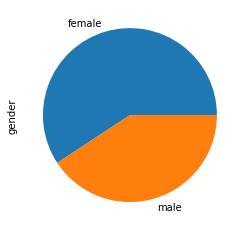

In [57]:
df['gender'].value_counts().plot(kind='pie')

In [59]:
print(df['gender'].value_counts(normalize=True))

female    0.592605
male      0.407395
Name: gender, dtype: float64


In [64]:
##60% are female images rest are of males#
#size of smallest image is more than 60

In [65]:
df1['gender']=df1['path'].apply(gender)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
df1

,path,size,gender
0,D:/data science/Module-2/cropped/male_crop\mal...,182,male
1,D:/data science/Module-2/cropped/male_crop\mal...,81,male
2,D:/data science/Module-2/cropped/male_crop\mal...,81,male
3,D:/data science/Module-2/cropped/male_crop\mal...,122,male
4,D:/data science/Module-2/cropped/male_crop\mal...,273,male
...,...,...,...
6053,D:/data science/Module-2/cropped/female_crop\f...,182,female
6054,D:/data science/Module-2/cropped/female_crop\f...,81,female
6055,D:/data science/Module-2/cropped/female_crop\f...,122,female
6056,D:/data science/Module-2/cropped/female_crop\f...,182,female


# Resize Image

In [67]:
#read image

In [68]:
path_resize=df['path'][0]

In [70]:
img=cv2.imread(path_resize)

In [71]:
#convert to gray scale

In [73]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [76]:
path_resize=df['path'][0]
#read image
img=cv2.imread(path_resize)
#convert to gray scale
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#resize into 100x100
size=gray.shape[0]
if size>=100:
    gray_re=cv2.resize(gray,(100,100),cv2.INTER_AREA)#shrink
else:
    gray_re=cv2.resize(gray,(100,100),cv2.INTER_CUBIC)#shrink


In [77]:
gray_re.shape

(100, 100)

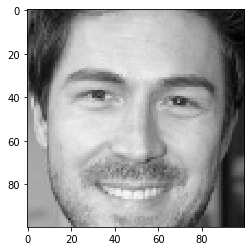

In [82]:
plt.imshow(gray_re,cmap='gray')

In [83]:
def re_size(path_resize):
    img=cv2.imread(path_resize)
#convert to gray scale
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#resize into 100x100
    size=gray.shape[0]
    try:
        if size>=100:
        gray_re=cv2.resize(gray,(100,100),cv2.INTER_AREA)#shrink
        else:
        gray_re=cv2.resize(gray,(100,100),cv2.INTER_CUBIC)#shrink
        return gray_re.flatten()
    except:
        None

In [85]:
len(re_size(path[0]))

10000

In [86]:
df1['structured data']=df1['path'].apply(re_size)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
df1.head()

,path,size,gender,structured data
0,D:/data science/Module-2/cropped/male_crop\mal...,182,male,"[106, 100, 81, 69, 71, 48, 51, 55, 41, 17, 30,..."
1,D:/data science/Module-2/cropped/male_crop\mal...,81,male,"[45, 47, 48, 48, 48, 49, 50, 52, 50, 45, 46, 4..."
2,D:/data science/Module-2/cropped/male_crop\mal...,81,male,"[165, 184, 209, 224, 220, 211, 193, 170, 153, ..."
3,D:/data science/Module-2/cropped/male_crop\mal...,122,male,"[141, 143, 148, 156, 161, 173, 157, 138, 146, ..."
4,D:/data science/Module-2/cropped/male_crop\mal...,273,male,"[180, 115, 41, 103, 23, 25, 36, 35, 25, 31, 38..."


In [89]:
df2=df1['structured data'].apply(pd.Series)

In [90]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,106,100,81,69,71,48,51,55,41,17,...,17,18,26,28,31,30,31,29,31,31
1,45,47,48,48,48,49,50,52,50,45,...,137,135,134,135,138,138,137,138,138,135
2,165,184,209,224,220,211,193,170,153,148,...,14,14,14,13,13,14,14,14,14,15
3,141,143,148,156,161,173,157,138,146,121,...,205,203,173,86,72,60,46,59,88,148
4,180,115,41,103,23,25,36,35,25,31,...,112,110,104,112,86,83,116,126,111,113


In [91]:
df2=pd.concat((df1['gender'],df2),axis=1)

In [102]:
df2.shape

(5455, 10001)

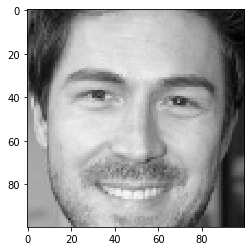

In [98]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')

In [100]:
import pickle

In [101]:
pickle.dump(df2,open("D:/data science/Module-2/data/dataframe_images_100_100.pickle","wb"))